In [1]:
HOME = '/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning'
%cd {HOME}

/content/drive/My Drive/Colab Notebooks/hands_on_machine_learning/hands_on_machine_learning


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDRegressor

sns.set()

In [0]:
iris_db = load_iris()

In [4]:
# Normal Equation
X = iris_db.data[:, 2].reshape(-1, 1)
y = iris_db.data[:, 3].reshape(-1, 1)
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.41575542]]), array([-0.36307552]))

## Gradient Descent

Linear regression cost function: <br>
$ J(\theta) = \frac{1}{2m}\sum^m_{i=1}(\hat{y_i} - y_i)^2$



In [0]:
X = iris_db.data[:, 2].reshape(-1, 1)
X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)
y = iris_db.data[:, 3].reshape(-1, 1)

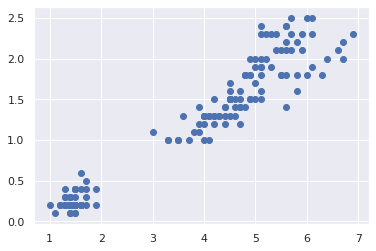

In [6]:
plt.scatter(X[:, 1], y)

In [0]:
n = X.shape[1]
start_theta = np.random.randn(n, 1)

In [8]:
# Gradient Descent


def lin_gradient_descent(X, y, n_iter=100, alpha=.1):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))

    for _ in range(n_iter):
        for j in range(n):
            d_sum = 0
            for i in range(m):
                d_sum += (X[i, :].dot(theta) - y[i]) * X[i, j]
            d_sum /= m
            theta[j] = theta[j] - alpha * d_sum
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)
    return theta, theta_hist

gd_theta, gd_theta_hist = lin_gradient_descent(X, y)
gd_theta

array([[-0.65473226],
       [ 0.47890968]])

In [9]:
# Stochastic Gradient Descent


def lin_stochastic_gradient_descent(X, y, n_iter, alpha_=None, t0=1, t1=10, shuffle=True):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))

    if shuffle:
        idx = np.arange(m)
        np.random.shuffle(idx)
    else:
        idx = np.random.randint(0, 150, m)
    
    for epoch in range(n_iter):
        alpha = t0 / (epoch + t1) if alpha_ is None else alpha_
        for i in idx:
            for j in range(n):
                delta = (X[i, :].dot(theta) - y[i]) * X[i, j]
                theta[j] = theta[j] - alpha * delta
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)
    return theta, theta_hist


sgd_theta, sgd_theta_hist = lin_stochastic_gradient_descent(X, y, 100)
sgd_theta

array([[-0.38582703],
       [ 0.41633191]])

In [10]:
# Mini-batch Gradient Descent

mini_gd_hist = np.empty((1, 2))

def lin_mini_gradient_descent(X, y, n_iter=500, alpha=.1, set_size=20):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))
    
    for _ in range(n_iter):
        for idx in np.random.randint(0, m - set_size, int(m/set_size)):
            for j in range(n):
                d_sum = 0
                for i in np.arange(idx, idx + set_size):
                    d_sum += (X[i, :].dot(theta) - y[i]) * X[i, j]
                d_sum /= m
                theta[j] = theta[j] - alpha * d_sum
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)        
    return theta, theta_hist


mini_gd_theta, mini_gd_hist = lin_mini_gradient_descent(X, y)
mini_gd_theta

array([[-0.33947009],
       [ 0.40519256]])

In [0]:
x_ = np.array([[1, 1], [1, 7]])
gd_y = x_.dot(gd_theta)
sgd_y = x_.dot(sgd_theta)
mini_gd_y = x_.dot(mini_gd_theta)

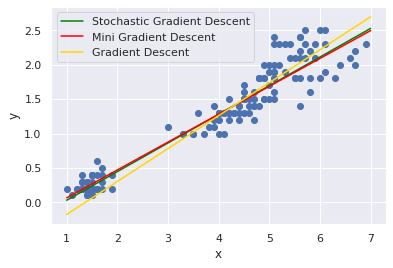

In [12]:
plt.scatter(X[:, 1], y)
plt.plot([1, 7], sgd_y, c='green', label='Stochastic Gradient Descent')
plt.plot([1, 7], mini_gd_y, c='red', label='Mini Gradient Descent')
plt.plot([1, 7], gd_y, c='gold', label='Gradient Descent')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

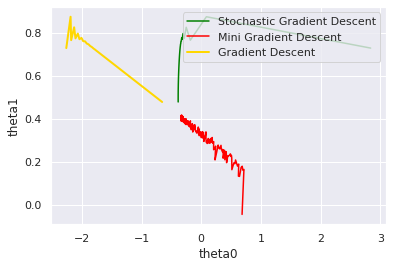

In [13]:
plt.plot(sgd_theta_hist[:, 0], gd_theta_hist[:, 1], c='green', label='Stochastic Gradient Descent')
plt.plot(mini_gd_hist[:, 0], mini_gd_hist[:, 1], c='red', label='Mini Gradient Descent')
plt.plot(gd_theta_hist[:, 0], gd_theta_hist[:, 1], c='gold', label='Gradient Descent', lw=2)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.legend()

In [0]:
X = iris_db.data[:, 2:]
y = (iris_db.target == 0).astype(int)

Text(0, 0.5, 'petal width (cm)')

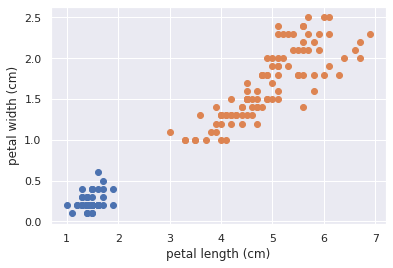

In [35]:
X1 = X[ y == 1 ]
X0 = X[ y != 1 ]
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X0[:, 0], X0[:, 1])
plt.xlabel(iris_db.feature_names[2])
plt.ylabel(iris_db.feature_names[3])

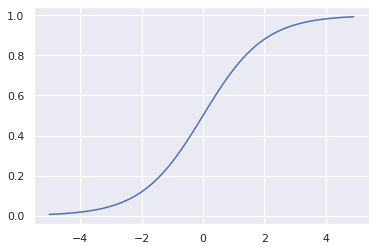

In [27]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

t = np.arange(-5, 5, 0.1)
plt.plot(t, sigmoid(t))

In [0]:
X = np.concatenate((np.ones([X.shape[0], 1]), X), axis=1)

In [39]:
def log_gradient_descent(X, y, n_iter=1000, alpha=.1):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))

    for _ in range(n_iter):
        for j in range(n):
            d_sum = 0
            for i in range(m):
                d_sum += (sigmoid(X[i, :].dot(theta)) - y[i]) * X[i, j]
            d_sum /= m
            theta[j] = theta[j] - alpha * d_sum
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)
    return theta, theta_hist

gd_theta, gd_theta_hist = log_gradient_descent(X, y)
gd_theta

array([[ 4.80282626],
       [-1.60452402],
       [-1.13751311]])

In [50]:
# Stochastic Gradient Descent


def log_stochastic_gradient_descent(X, y, n_iter, alpha_=None, t0=1, t1=10, shuffle=True):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))

    if shuffle:
        idx = np.arange(m)
        np.random.shuffle(idx)
    else:
        idx = np.random.randint(0, 150, m)
    
    for epoch in range(n_iter):
        alpha = t0 / (epoch + t1) if alpha_ is None else alpha_
        for i in idx:
            for j in range(n):
                delta = (sigmoid(X[i, :].dot(theta)) - y[i]) * X[i, j]
                theta[j] = theta[j] - alpha * delta
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)
    return theta, theta_hist


sgd_theta, sgd_theta_hist = log_stochastic_gradient_descent(X, y, 100)
sgd_theta

array([[ 7.39383737],
       [-2.1638646 ],
       [-2.59454015]])

In [53]:
# Mini-batch Gradient Descent

mini_gd_hist = np.empty((1, 2))

def log_mini_gradient_descent(X, y, n_iter=500, alpha=.1, set_size=20):
    m, n = X.shape
    theta = np.random.randn(n, 1)
    theta_hist = theta.reshape((1, -1))
    
    for _ in range(n_iter):
        for idx in np.random.randint(0, m - set_size, int(m/set_size)):
            for j in range(n):
                d_sum = 0
                for i in np.arange(idx, idx + set_size):
                    d_sum += (sigmoid(X[i, :].dot(theta)) - y[i]) * X[i, j]
                d_sum /= m
                theta[j] = theta[j] - alpha * d_sum
        theta_hist = np.append(theta_hist, theta.reshape((1, -1)), axis=0)        
    return theta, theta_hist


mini_gd_theta, mini_gd_hist = log_mini_gradient_descent(X, y)
mini_gd_theta

array([[ 3.42080851],
       [-1.28485781],
       [-0.74979761]])

In [0]:
# 0 = theta0 + theta1 * x1 + theta2 * x2 => x2 = - (theta0 + theta1 * x1) / theta2
def calc_x2(t, theta):
    return - (theta[0] + theta[1] * t) / theta[2]

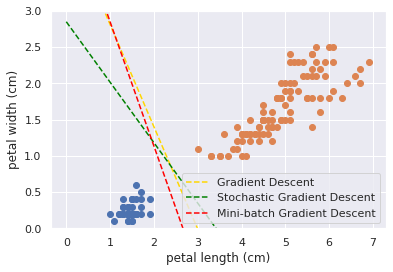

In [54]:
t = np.arange(0, 5, 0.1)

plt.plot(t, calc_x2(t, gd_theta), '--', c='gold', label='Gradient Descent')
plt.plot(t, calc_x2(t, sgd_theta), '--', c='green', label='Stochastic Gradient Descent')
plt.plot(t, calc_x2(t, mini_gd_theta), '--', c='red', label='Mini-batch Gradient Descent')
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X0[:, 0], X0[:, 1])
plt.xlabel(iris_db.feature_names[2])
plt.ylabel(iris_db.feature_names[3])
plt.ylim([0, 3])
plt.legend()